In [1]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.models import Model
import numpy as np
import os

def extract_features(model, folder_path):
    # Get a list of all image files in the folder
    img_paths = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.endswith(('.png', '.jpg', '.jpeg'))]

    # Use list comprehension to process images and extract features
    features = []
    for img_path in img_paths:
        try:
            img = image.load_img(img_path, target_size=model.input_shape[1:3])
            img_array = image.img_to_array(img)
            img_array = np.expand_dims(img_array, axis=0)
            img_array = preprocess_input(img_array)
            feature = model.predict(img_array)
            features.append(feature)
        except Exception as e:
            print(f"Error processing image {img_path}: {e}")

    # Stack the extracted features into a single NumPy array
    features = np.vstack(features)

    return features

# Load the pre-trained VGG16 model with top (fully connected) layers
base_model = VGG16(weights='imagenet', include_top=True, input_shape=(224, 224, 3))  # Adjust input_shape accordingly

# Create a new model that includes only the convolutional base of VGG16
model = Model(inputs=base_model.input, outputs=base_model.get_layer('block5_conv3').output)

# Specify folder paths for emotion of child face image sets
angry_folder_path = '/Users/isurudissanayake/Documents/Data/DATA_SET/EMOTION/Data_set/Angry'
fear_folder_path = '/Users/isurudissanayake/Documents/Data/DATA_SET/EMOTION/Data_set/Fear'
joy_folder_path = '/Users/isurudissanayake/Documents/Data/DATA_SET/EMOTION/Data_set/Joy'
natural_folder_path = '/Users/isurudissanayake/Documents/Data/DATA_SET/EMOTION/Data_set/Natural'
sadness_folder_path = '/Users/isurudissanayake/Documents/Data/DATA_SET/EMOTION/Data_set/Sadness'
surprise_folder_path = '/Users/isurudissanayake/Documents/Data/DATA_SET/EMOTION/Data_set/Surprise'

# Extract features for angry child faces
angry_features = extract_features(model, angry_folder_path)

# Extract features for fear child faces
fear_features = extract_features(model, fear_folder_path)

# Extract features for joy child faces
joy_features = extract_features(model, joy_folder_path)

# Extract features for natural child faces
natural_features = extract_features(model, natural_folder_path)

# Extract features for sadness child faces
sadness_features = extract_features(model, sadness_folder_path)

# Extract features for surprise child faces
surprise_features = extract_features(model, surprise_folder_path)

# Save the extracted features for later use in training
np.save('/Users/isurudissanayake/Documents/Data/DATA_SET/EMOTION/Feature_extraction/VGG16/angry/angry_features.npy', angry_features)
np.save('/Users/isurudissanayake/Documents/Data/DATA_SET/EMOTION/Feature_extraction/VGG16/fear/fear_features.npy', fear_features)
np.save('/Users/isurudissanayake/Documents/Data/DATA_SET/EMOTION/Feature_extraction/VGG16/joy/joy_features.npy', joy_features)
np.save('/Users/isurudissanayake/Documents/Data/DATA_SET/EMOTION/Feature_extraction/VGG16/natural/natural_features.npy', natural_features)
np.save('/Users/isurudissanayake/Documents/Data/DATA_SET/EMOTION/Feature_extraction/VGG16/sadness/sadness_features.npy', sadness_features)
np.save('/Users/isurudissanayake/Documents/Data/DATA_SET/EMOTION/Feature_extraction/VGG16/surprise/surprise_features.npy', surprise_features)

2024-03-03 20:03:10.770721: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1/1 [==============================] - 0s 103ms/step


In [14]:
# import numpy as np
# from sklearn.utils import shuffle
# from sklearn.model_selection import train_test_split
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Dropout, Flatten
# from tensorflow.keras.models import load_model
# 
# # Load the extracted features for emotions
# angry_features = np.load('/Users/isurudissanayake/Documents/Data/DATA_SET/EMOTION/Feature_extraction/VGG16/angry/angry_features.npy')
# fear_features = np.load('/Users/isurudissanayake/Documents/Data/DATA_SET/EMOTION/Feature_extraction/VGG16/fear/fear_features.npy')
# joy_features = np.load('/Users/isurudissanayake/Documents/Data/DATA_SET/EMOTION/Feature_extraction/VGG16/joy/joy_features.npy')
# natural_features = np.load('/Users/isurudissanayake/Documents/Data/DATA_SET/EMOTION/Feature_extraction/VGG16/natural/natural_features.npy')
# sadness_features = np.load('/Users/isurudissanayake/Documents/Data/DATA_SET/EMOTION/Feature_extraction/VGG16/sadness/sadness_features.npy')
# surprise_features = np.load('/Users/isurudissanayake/Documents/Data/DATA_SET/EMOTION/Feature_extraction/VGG16/surprise/surprise_features.npy')
# # 
# # Assign labels (assuming you have labeled data for each emotion)
# angry_labels = np.ones(angry_features.shape[0]) * 0  # Assuming 0 represents angry
# fear_labels = np.ones(fear_features.shape[0]) * 1  # Assuming 1 represents fear
# joy_labels = np.ones(joy_features.shape[0]) * 2  # Assuming 2 represents joy
# natural_labels = np.ones(natural_features.shape[0]) * 3  # Assuming 3 represents natural
# sadness_labels = np.ones(sadness_features.shape[0]) * 4  # Assuming 4 represents sadness
# surprise_labels = np.ones(surprise_features.shape[0]) * 5  # Assuming 5 represents surprise
# 
# # Combine features and labels
# X = np.vstack([angry_features, fear_features, joy_features, natural_features, sadness_features, surprise_features])
# y = np.concatenate([angry_labels, fear_labels, joy_labels, natural_labels, sadness_labels, surprise_labels])
# 
# # Shuffle the data
# X, y = shuffle(X, y, random_state=42)
# 
# # Split the data into training and testing sets (70% training, 30% testing)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# 
# # Model definition
# model = Sequential()
# model.add(Flatten(input_shape=X_train.shape[1:]))  # Input shape based on extracted features
# model.add(Dense(512, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(6, activation='softmax'))  # Assuming 6 emotions
# 
# model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# 
# # Model training
# model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)
# 
# # Save the trained model to a file named 'emotion_model.h5'
# model.save('/Users/isurudissanayake/Documents/Data/DATA_SET/EMOTION/Feature_extraction/VGG16/emotion_model.h5')
# 
# # Model evaluation
# test_loss, test_accuracy = model.evaluate(X_test, y_test)
# print(f'Test Accuracy: {test_accuracy}')

Epoch 1/100
13/13 [==============================] - 2s 91ms/step - loss: 64.6545 - accuracy: 0.3985 - val_loss: 25.9475 - val_accuracy: 0.5612
Epoch 2/100
13/13 [==============================] - 1s 85ms/step - loss: 17.7778 - accuracy: 0.6555 - val_loss: 24.3342 - val_accuracy: 0.5612
Epoch 3/100
13/13 [==============================] - 1s 88ms/step - loss: 8.9356 - accuracy: 0.7918 - val_loss: 19.4602 - val_accuracy: 0.5714
Epoch 4/100
13/13 [==============================] - 1s 83ms/step - loss: 6.8220 - accuracy: 0.7995 - val_loss: 18.1146 - val_accuracy: 0.5612
Epoch 5/100
13/13 [==============================] - 1s 84ms/step - loss: 4.7063 - accuracy: 0.8535 - val_loss: 17.3013 - val_accuracy: 0.5714
Epoch 6/100
13/13 [==============================] - 1s 80ms/step - loss: 5.2688 - accuracy: 0.8483 - val_loss: 18.3179 - val_accuracy: 0.5816
Epoch 7/100
13/13 [==============================] - 1s 81ms/step - loss: 5.1654 - accuracy: 0.8740 - val_loss: 14.2703 - val_accuracy: 0.51

In [22]:
# import numpy as np
# from sklearn.utils import shuffle
# from sklearn.model_selection import train_test_split
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Dropout, Flatten
# from tensorflow.keras.models import load_model
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
# 
# # Load the extracted features for emotions
# angry_features = np.load('/Users/isurudissanayake/Documents/Data/DATA_SET/EMOTION/Feature_extraction/VGG16/angry/angry_features.npy')
# fear_features = np.load('/Users/isurudissanayake/Documents/Data/DATA_SET/EMOTION/Feature_extraction/VGG16/fear/fear_features.npy')
# joy_features = np.load('/Users/isurudissanayake/Documents/Data/DATA_SET/EMOTION/Feature_extraction/VGG16/joy/joy_features.npy')
# natural_features = np.load('/Users/isurudissanayake/Documents/Data/DATA_SET/EMOTION/Feature_extraction/VGG16/natural/natural_features.npy')
# sadness_features = np.load('/Users/isurudissanayake/Documents/Data/DATA_SET/EMOTION/Feature_extraction/VGG16/sadness/sadness_features.npy')
# surprise_features = np.load('/Users/isurudissanayake/Documents/Data/DATA_SET/EMOTION/Feature_extraction/VGG16/surprise/surprise_features.npy')
# 
# # Assign labels (assuming you have labeled data for each emotion)
# angry_labels = np.ones(angry_features.shape[0]) * 0  # Assuming 0 represents angry
# fear_labels = np.ones(fear_features.shape[0]) * 1  # Assuming 1 represents fear
# joy_labels = np.ones(joy_features.shape[0]) * 2  # Assuming 2 represents joy
# natural_labels = np.ones(natural_features.shape[0]) * 3  # Assuming 3 represents natural
# sadness_labels = np.ones(sadness_features.shape[0]) * 4  # Assuming 4 represents sadness
# surprise_labels = np.ones(surprise_features.shape[0]) * 5  # Assuming 5 represents surprise
# 
# # Combine features and labels
# X = np.vstack([angry_features, fear_features, joy_features, natural_features, sadness_features, surprise_features])
# y = np.concatenate([angry_labels, fear_labels, joy_labels, natural_labels, sadness_labels, surprise_labels])
# 
# # Shuffle the data
# X, y = shuffle(X, y, random_state=42)
# 
# # Split the data into training and testing sets (70% training, 30% testing)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# 
# # Create an ImageDataGenerator instance for data augmentation
# datagen = ImageDataGenerator(
#     rotation_range=20,
#     width_shift_range=0.2,
#     height_shift_range=0.2,
#     horizontal_flip=True
# )
# 
# # Fit the ImageDataGenerator to your training data
# datagen.fit(X_train)
# 
# # Model definition
# model = Sequential()
# model.add(Flatten(input_shape=(X_train.shape[1:])))  # Input shape based on extracted features
# model.add(Dense(512, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(6, activation='softmax'))  # Assuming 6 emotions
# 
# model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# 
# # Model training with augmented data
# history = model.fit(datagen.flow(X_train, y_train, batch_size=32),
#                     steps_per_epoch=len(X_train) / 32,
#                     epochs=100,
#                     validation_data=(X_test, y_test))
# 
# # Save the trained model to a file named 'emotion_model.h5'
# model.save('/Users/isurudissanayake/Documents/Data/DATA_SET/EMOTION/Feature_extraction/VGG16/emotion_model.h5')
# 
# # Model evaluation
# test_loss, test_accuracy = model.evaluate(X_test, y_test)
# print(f'Test Accuracy: {test_accuracy}')


Epoch 1/100


2024-03-03 21:19:07.064935: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


15/15 [==============================] - 5s 268ms/step - loss: 71.1847 - accuracy: 0.3142 - val_loss: 20.5298 - val_accuracy: 0.4258
Epoch 2/100
15/15 [==============================] - 4s 279ms/step - loss: 20.0943 - accuracy: 0.4620 - val_loss: 5.0124 - val_accuracy: 0.4689
Epoch 3/100
15/15 [==============================] - 5s 349ms/step - loss: 4.4211 - accuracy: 0.4476 - val_loss: 1.7160 - val_accuracy: 0.4737
Epoch 4/100
15/15 [==============================] - 4s 276ms/step - loss: 2.0116 - accuracy: 0.4374 - val_loss: 1.6060 - val_accuracy: 0.4785
Epoch 5/100
15/15 [==============================] - 4s 271ms/step - loss: 1.8205 - accuracy: 0.4743 - val_loss: 1.4754 - val_accuracy: 0.4833
Epoch 6/100
15/15 [==============================] - 4s 271ms/step - loss: 1.8037 - accuracy: 0.4990 - val_loss: 1.5504 - val_accuracy: 0.4641
Epoch 7/100
15/15 [==============================] - 5s 292ms/step - loss: 2.0034 - accuracy: 0.4928 - val_loss: 1.4906 - val_accuracy: 0.4689
Epoch 8/

In [70]:
# import numpy as np
# from sklearn.utils import shuffle
# from sklearn.model_selection import train_test_split
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Dropout, Flatten
# from tensorflow.keras.models import load_model
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
# 
# # Load the extracted features for emotions
# angry_features = np.load('/Users/isurudissanayake/Documents/Data/DATA_SET/EMOTION/Feature_extraction/VGG16/angry/angry_features.npy')
# fear_features = np.load('/Users/isurudissanayake/Documents/Data/DATA_SET/EMOTION/Feature_extraction/VGG16/fear/fear_features.npy')
# joy_features = np.load('/Users/isurudissanayake/Documents/Data/DATA_SET/EMOTION/Feature_extraction/VGG16/joy/joy_features.npy')
# natural_features = np.load('/Users/isurudissanayake/Documents/Data/DATA_SET/EMOTION/Feature_extraction/VGG16/natural/natural_features.npy')
# sadness_features = np.load('/Users/isurudissanayake/Documents/Data/DATA_SET/EMOTION/Feature_extraction/VGG16/sadness/sadness_features.npy')
# surprise_features = np.load('/Users/isurudissanayake/Documents/Data/DATA_SET/EMOTION/Feature_extraction/VGG16/surprise/surprise_features.npy')
# 
# # Assign labels (assuming you have labeled data for each emotion)
# angry_labels = np.ones(angry_features.shape[0]) * 0  # Assuming 0 represents angry
# fear_labels = np.ones(fear_features.shape[0]) * 1  # Assuming 1 represents fear
# joy_labels = np.ones(joy_features.shape[0]) * 2  # Assuming 2 represents joy
# natural_labels = np.ones(natural_features.shape[0]) * 3  # Assuming 3 represents natural
# sadness_labels = np.ones(sadness_features.shape[0]) * 4  # Assuming 4 represents sadness
# surprise_labels = np.ones(surprise_features.shape[0]) * 5  # Assuming 5 represents surprise
# 
# # Combine features and labels
# X = np.vstack([angry_features, fear_features, joy_features, natural_features, sadness_features, surprise_features])
# y = np.concatenate([angry_labels, fear_labels, joy_labels, natural_labels, sadness_labels, surprise_labels])
# 
# # Shuffle the data
# X, y = shuffle(X, y, random_state=42)
# 
# # Split the data into training and testing sets (70% training, 30% testing)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# 
# # Data Augmentation
# datagen = ImageDataGenerator(
#     rotation_range=20,
#     width_shift_range=0.1,
#     height_shift_range=0.1,
#     shear_range=0.2,
#     zoom_range=0.2,
#     horizontal_flip=True,
#     vertical_flip=True,
#     fill_mode='nearest'
# )
# 
# # Model definition
# model = Sequential()
# model.add(Flatten(input_shape=X_train.shape[1:]))  # Input shape based on extracted features
# model.add(Dense(512, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(6, activation='softmax'))  # Assuming 6 emotions
# 
# model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# 
# # Model training with data augmentation
# datagen.fit(X_train)
# model.fit(datagen.flow(X_train, y_train, batch_size=32), epochs=100, validation_data=(X_test, y_test))
# 
# # Save the trained model to a file named 'emotion_model.h5'
# model.save('/Users/isurudissanayake/Documents/Data/DATA_SET/EMOTION/Feature_extraction/VGG16/emotion_model.h5')
# 
# # Model evaluation
# test_loss, test_accuracy = model.evaluate(X_test, y_test)
# print(f'Test Accuracy: {test_accuracy}')


Epoch 1/100


2024-03-07 10:00:25.978217: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


16/16 [==============================] - 5s 252ms/step - loss: 56.2201 - accuracy: 0.3552 - val_loss: 26.6338 - val_accuracy: 0.4785
Epoch 2/100
16/16 [==============================] - 4s 249ms/step - loss: 17.0539 - accuracy: 0.4209 - val_loss: 7.3408 - val_accuracy: 0.4641
Epoch 3/100
16/16 [==============================] - 4s 247ms/step - loss: 5.6440 - accuracy: 0.4004 - val_loss: 3.4183 - val_accuracy: 0.4306
Epoch 4/100
16/16 [==============================] - 4s 244ms/step - loss: 2.5712 - accuracy: 0.4271 - val_loss: 2.7368 - val_accuracy: 0.4593
Epoch 5/100
16/16 [==============================] - 4s 247ms/step - loss: 1.8896 - accuracy: 0.4887 - val_loss: 2.3919 - val_accuracy: 0.4785
Epoch 6/100
16/16 [==============================] - 4s 256ms/step - loss: 2.0569 - accuracy: 0.4969 - val_loss: 2.2077 - val_accuracy: 0.4737
Epoch 7/100
16/16 [==============================] - 4s 252ms/step - loss: 1.7201 - accuracy: 0.5175 - val_loss: 2.0515 - val_accuracy: 0.4737
Epoch 8/

In [78]:
# import numpy as np
# from sklearn.utils import shuffle
# from sklearn.model_selection import train_test_split
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Dropout, Flatten, BatchNormalization
# from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.callbacks import LearningRateScheduler, EarlyStopping
# from tensorflow.keras.regularizers import l2
# from tensorflow.keras.models import load_model
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
# 
# # Load the extracted features for emotions
# angry_features = np.load('/Users/isurudissanayake/Documents/Data/DATA_SET/EMOTION/Feature_extraction/VGG16/angry/angry_features.npy')
# fear_features = np.load('/Users/isurudissanayake/Documents/Data/DATA_SET/EMOTION/Feature_extraction/VGG16/fear/fear_features.npy')
# joy_features = np.load('/Users/isurudissanayake/Documents/Data/DATA_SET/EMOTION/Feature_extraction/VGG16/joy/joy_features.npy')
# natural_features = np.load('/Users/isurudissanayake/Documents/Data/DATA_SET/EMOTION/Feature_extraction/VGG16/natural/natural_features.npy')
# sadness_features = np.load('/Users/isurudissanayake/Documents/Data/DATA_SET/EMOTION/Feature_extraction/VGG16/sadness/sadness_features.npy')
# surprise_features = np.load('/Users/isurudissanayake/Documents/Data/DATA_SET/EMOTION/Feature_extraction/VGG16/surprise/surprise_features.npy')
# 
# # Assign labels (assuming you have labeled data for each emotion)
# angry_labels = np.ones(angry_features.shape[0]) * 0  # Assuming 0 represents angry
# fear_labels = np.ones(fear_features.shape[0]) * 1  # Assuming 1 represents fear
# joy_labels = np.ones(joy_features.shape[0]) * 2  # Assuming 2 represents joy
# natural_labels = np.ones(natural_features.shape[0]) * 3  # Assuming 3 represents natural
# sadness_labels = np.ones(sadness_features.shape[0]) * 4  # Assuming 4 represents sadness
# surprise_labels = np.ones(surprise_features.shape[0]) * 5  # Assuming 5 represents surprise
# 
# # Combine features and labels
# X = np.vstack([angry_features, fear_features, joy_features, natural_features, sadness_features, surprise_features])
# y = np.concatenate([angry_labels, fear_labels, joy_labels, natural_labels, sadness_labels, surprise_labels])
# 
# # Shuffle the data
# X, y = shuffle(X, y, random_state=42)
# 
# # Split the data into training and testing sets (70% training, 30% testing)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# 
# # Data Augmentation
# datagen = ImageDataGenerator(
#     rotation_range=20,
#     width_shift_range=0.1,
#     height_shift_range=0.1,
#     shear_range=0.2,
#     zoom_range=0.2,
#     horizontal_flip=True,
#     vertical_flip=True,
#     fill_mode='nearest'
# )
# 
# # Model definition
# model = Sequential()
# model.add(Flatten(input_shape=X_train.shape[1:]))
# model.add(Dense(512, activation='relu', kernel_regularizer=l2(0.001)))
# model.add(BatchNormalization())
# model.add(Dropout(0.5))
# model.add(Dense(256, activation='relu'))
# model.add(BatchNormalization())
# model.add(Dense(6, activation='softmax'))
# 
# # Learning Rate Scheduler
# def lr_scheduler(epoch, lr):
#     if epoch < 50:
#         return lr
#     else:
#         return lr * 0.1
# 
# optimizer = Adam()
# model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# 
# # Early Stopping
# early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
# 
# # Model training with data augmentation and advanced techniques
# datagen.fit(X_train)
# lr_callback = LearningRateScheduler(lr_scheduler)
# model.fit(datagen.flow(X_train, y_train, batch_size=32), epochs=100, validation_data=(X_test, y_test), callbacks=[lr_callback, early_stopping])
# 
# # Save the trained model to a file named 'emotion_model.h5'
# model.save('/Users/isurudissanayake/Documents/Data/DATA_SET/EMOTION/Feature_extraction/VGG16/emotion_model.h5')
# 
# # Model evaluation
# test_loss, test_accuracy = model.evaluate(X_test, y_test)
# print(f'Test Accuracy: {test_accuracy}')


Epoch 1/100


2024-03-07 21:30:49.635005: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


16/16 [==============================] - 6s 313ms/step - loss: 3.1162 - accuracy: 0.2813 - val_loss: 4.6294 - val_accuracy: 0.5120 - lr: 0.0010
Epoch 2/100
16/16 [==============================] - 5s 278ms/step - loss: 2.9556 - accuracy: 0.3901 - val_loss: 4.6560 - val_accuracy: 0.3301 - lr: 0.0010
Epoch 3/100
16/16 [==============================] - 5s 286ms/step - loss: 2.7394 - accuracy: 0.5175 - val_loss: 5.0875 - val_accuracy: 0.3014 - lr: 0.0010
Epoch 4/100
16/16 [==============================] - 5s 285ms/step - loss: 2.7504 - accuracy: 0.5647 - val_loss: 3.2360 - val_accuracy: 0.5359 - lr: 0.0010
Epoch 5/100
16/16 [==============================] - 5s 286ms/step - loss: 2.6173 - accuracy: 0.6057 - val_loss: 3.4073 - val_accuracy: 0.4833 - lr: 0.0010
Epoch 6/100
16/16 [==============================] - 4s 267ms/step - loss: 2.5701 - accuracy: 0.6263 - val_loss: 3.5001 - val_accuracy: 0.4402 - lr: 0.0010
Epoch 7/100
16/16 [==============================] - 4s 264ms/step - loss: 2

In [2]:
import numpy as np
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load the extracted features for emotions
angry_features = np.load('/Users/isurudissanayake/Documents/Data/DATA_SET/EMOTION/Feature_extraction/VGG16/angry/angry_features.npy')
fear_features = np.load('/Users/isurudissanayake/Documents/Data/DATA_SET/EMOTION/Feature_extraction/VGG16/fear/fear_features.npy')
joy_features = np.load('/Users/isurudissanayake/Documents/Data/DATA_SET/EMOTION/Feature_extraction/VGG16/joy/joy_features.npy')
natural_features = np.load('/Users/isurudissanayake/Documents/Data/DATA_SET/EMOTION/Feature_extraction/VGG16/natural/natural_features.npy')
sadness_features = np.load('/Users/isurudissanayake/Documents/Data/DATA_SET/EMOTION/Feature_extraction/VGG16/sadness/sadness_features.npy')
surprise_features = np.load('/Users/isurudissanayake/Documents/Data/DATA_SET/EMOTION/Feature_extraction/VGG16/surprise/surprise_features.npy')

angry_labels = np.ones(angry_features.shape[0]) * 0  # Assuming 0 represents angry
fear_labels = np.ones(fear_features.shape[0]) * 1  # Assuming 1 represents fear
joy_labels = np.ones(joy_features.shape[0]) * 2  # Assuming 2 represents joy
natural_labels = np.ones(natural_features.shape[0]) * 3  # Assuming 3 represents natural
sadness_labels = np.ones(sadness_features.shape[0]) * 4  # Assuming 4 represents sadness
surprise_labels = np.ones(surprise_features.shape[0]) * 5  # Assuming 5 represents surprise
# Assign labels (assuming you have labeled data for each emotion)
# ... (same as before)

# Combine features and labels
X = np.vstack([angry_features, fear_features, joy_features, natural_features, sadness_features, surprise_features])
y = np.concatenate([angry_labels, fear_labels, joy_labels, natural_labels, sadness_labels, surprise_labels])

# Shuffle the data
X, y = shuffle(X, y, random_state=42)

# Split the data into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Data Augmentation with more options
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    shear_range=0.2,  # Add shearing for more variations
    zoom_range=0.2  # Add zooming for scale augmentation
)

# Fit the DataAugmentation to training data
datagen.fit(X_train)

# Model Definition with Hyperparameter Tuning
model = Sequential()
model.add(Flatten(input_shape=(X_train.shape[1:])))

# Try a larger first layer (but experiment to avoid overfitting)
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.3))  # Experiment with different dropout rates

# Add another hidden layer (might improve complexity capture)
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(6, activation='softmax'))  # Assuming 6 emotions

# Experiment with different optimizers (e.g., 'sgd' with momentum)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model with augmented data
history = model.fit(datagen.flow(X_train, y_train, batch_size=32),
                    steps_per_epoch=len(X_train) / 32,
                    epochs=150,  # Increase epochs if needed (beware of overfitting)
                    validation_data=(X_test, y_test))

# Save the trained model
model.save('/Users/isurudissanayake/Documents/Data/DATA_SET/EMOTION/Feature_extraction/VGG16/emotion_model.h5')

# Model Evaluation
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy}')


Epoch 1/150


2024-03-08 20:20:01.072518: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


15/15 [==============================] - 7s 385ms/step - loss: 60.7812 - accuracy: 0.3429 - val_loss: 24.0663 - val_accuracy: 0.2584
Epoch 2/150
15/15 [==============================] - 5s 317ms/step - loss: 19.6557 - accuracy: 0.3778 - val_loss: 8.5178 - val_accuracy: 0.5024
Epoch 3/150
15/15 [==============================] - 6s 371ms/step - loss: 12.0157 - accuracy: 0.4209 - val_loss: 7.8570 - val_accuracy: 0.2775
Epoch 4/150
15/15 [==============================] - 5s 331ms/step - loss: 9.4015 - accuracy: 0.4271 - val_loss: 7.4164 - val_accuracy: 0.5120
Epoch 5/150
15/15 [==============================] - 6s 369ms/step - loss: 6.5163 - accuracy: 0.5133 - val_loss: 4.4006 - val_accuracy: 0.4976
Epoch 6/150
15/15 [==============================] - 6s 352ms/step - loss: 5.7271 - accuracy: 0.5113 - val_loss: 4.5202 - val_accuracy: 0.5072
Epoch 7/150
15/15 [==============================] - 5s 329ms/step - loss: 5.5157 - accuracy: 0.5133 - val_loss: 3.8979 - val_accuracy: 0.5024
Epoch 8

In [7]:
# import numpy as np
# from sklearn.utils import shuffle
# from sklearn.model_selection import train_test_split, GridSearchCV
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Dropout, Flatten
# from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
# from sklearn.base import BaseEstimator
# from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
# 
# # Load the extracted features for emotions
# angry_features = np.load('/Users/isurudissanayake/Documents/Data/DATA_SET/EMOTION/Feature_extraction/VGG16/angry/angry_features.npy')
# fear_features = np.load('/Users/isurudissanayake/Documents/Data/DATA_SET/EMOTION/Feature_extraction/VGG16/fear/fear_features.npy')
# joy_features = np.load('/Users/isurudissanayake/Documents/Data/DATA_SET/EMOTION/Feature_extraction/VGG16/joy/joy_features.npy')
# natural_features = np.load('/Users/isurudissanayake/Documents/Data/DATA_SET/EMOTION/Feature_extraction/VGG16/natural/natural_features.npy')
# sadness_features = np.load('/Users/isurudissanayake/Documents/Data/DATA_SET/EMOTION/Feature_extraction/VGG16/sadness/sadness_features.npy')
# surprise_features = np.load('/Users/isurudissanayake/Documents/Data/DATA_SET/EMOTION/Feature_extraction/VGG16/surprise/surprise_features.npy')
# 
# angry_labels = np.ones(angry_features.shape[0]) * 0  # Assuming 0 represents angry
# fear_labels = np.ones(fear_features.shape[0]) * 1  # Assuming 1 represents fear
# joy_labels = np.ones(joy_features.shape[0]) * 2  # Assuming 2 represents joy
# natural_labels = np.ones(natural_features.shape[0]) * 3  # Assuming 3 represents natural
# sadness_labels = np.ones(sadness_features.shape[0]) * 4  # Assuming 4 represents sadness
# surprise_labels = np.ones(surprise_features.shape[0]) * 5  # Assuming 5 represents surprise
# 
# # Combine features and labels
# X = np.vstack([angry_features, fear_features, joy_features, natural_features, sadness_features, surprise_features])
# y = np.concatenate([angry_labels, fear_labels, joy_labels, natural_labels, sadness_labels, surprise_labels])
# 
# # Shuffle the data
# X, y = shuffle(X, y, random_state=42)
# 
# # Split the data into training and testing sets (70% training, 30% testing)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# 
# # Data Augmentation
# datagen = ImageDataGenerator(
#     rotation_range=20,
#     width_shift_range=0.2,
#     height_shift_range=0.2,
#     horizontal_flip=True,
#     shear_range=0.2,
#     zoom_range=0.2
# )
# datagen.fit(X_train)
# 
# # Model Definition Function
# def create_model(dense_layers, dense_units, dropout_rate, epochs):
#     model = Sequential()
#     model.add(Flatten(input_shape=(X_train.shape[1:])))
#     for i in range(dense_layers):
#         model.add(Dense(dense_units, activation='relu'))
#         model.add(Dropout(dropout_rate))
#     model.add(Dense(6, activation='softmax'))  # Assuming 6 emotions
#     model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
#     return model  # Return the created model object without fitting it
# 
# # Wrapper Class for Keras Model
# class KerasModelWrapper(KerasClassifier, BaseEstimator):
#     def __init__(self, build_fn=None, **kwargs):
#         super().__init__(build_fn=build_fn, **kwargs)
# 
# # Hyperparameter Grid for Tuning
# param_grid = {
#     'build_fn': [create_model],  # Your create_model function
#     'dense_layers': [1, 2],
#     'dense_units': [512, 1024],
#     'dropout_rate': [0.2, 0.3, 0.4],
#     'epochs': [100, 150, 200]
# }
# 
# # Use the wrapper class in GridSearchCV
# grid_search = GridSearchCV(estimator=KerasModelWrapper(), param_grid=param_grid, cv=5,
#                            scoring='accuracy', n_jobs=-1, verbose=1)
# grid_search.fit(X_train, y_train)
# 
# # Best Model and Parameters
# best_model = grid_search.best_estimator_
# best_params = grid_search.best_params_
# print(f"Best Parameters: {best_params}")
# 
# # Evaluation on Test Data
# test_loss, test_accuracy = best_model.evaluate(X_test, y_test)
# print(f'Test Accuracy with Best Parameters: {test_accuracy}')
# 
# # Save the best model
# best_model.model.save('/Users/isurudissanayake/Documents/Data/DATA_SET/EMOTION/Feature_extraction/VGG16/emotion_model_tuned.h5')


/var/folders/rl/rrwm4k2j0jl36rstbnx1jwfr0000gn/T/ipykernel_1657/1336265144.py:61: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  super().__init__(build_fn=build_fn, **kwargs)


AttributeError: 'KerasModelWrapper' object has no attribute '__call__'

In [2]:
import cv2
import numpy as np
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.models import load_model, Model  # Import the Model class

# Define paths
input_image_path = '/Users/isurudissanayake/Documents/Data/DATA_SET/EMOTION/Data_set/Sadness/0033.jpg'  # Replace with your image path
model_path = '/Users/isurudissanayake/Documents/Data/DATA_SET/EMOTION/Feature_extraction/VGG16/emotion_model.h5'
target_size = (224, 224)

# Load the pre-trained VGG16 model with top layers included
base_model = VGG16(weights='imagenet', include_top=True)

# Create a new model that takes the input of VGG16 and outputs the desired layer
model = Model(inputs=base_model.input, outputs=base_model.get_layer('block5_conv3').output)

# Process the input image
img = cv2.imread(input_image_path)
img = cv2.resize(img, target_size)
img = preprocess_input(np.expand_dims(image.img_to_array(img), axis=0))

# Extract features using the full VGG16 model
features = model.predict(img)  # Use the new model

# Reshape features to match the expected input shape of trained_model
features_reshaped = np.reshape(features, (features.shape[0], 14, 14, 512))  # Reshape to (None, 14, 14, 512)

# Load the trained emotion classification model
trained_model = load_model(model_path)

# Predict emotion using the trained model and extracted features
prediction = trained_model.predict(features_reshaped)

# Interpret the prediction
emotion_labels = ['Angry', 'Fear', 'Joy', 'Natural', 'Sadness', 'Surprise']
predicted_emotion_index = np.argmax(prediction)
predicted_emotion = emotion_labels[predicted_emotion_index]
prediction_probability = prediction[0][predicted_emotion_index]

print(f"Predicted emotion: {predicted_emotion}")
print(f"Prediction probability: {prediction_probability:.2f}")


1/1 [==============================] - 0s 122ms/step
Predicted emotion: Sadness
Prediction probability: 0.91


In [ ]:
import cv2
import numpy as np
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.models import load_model, Model  # Import the Model class
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from PIL import Image
from IPython.display import display
from lime.lime_image import LimeImageExplainer

# Define paths
input_image_path = '/Users/isurudissanayake/Documents/Data/DATA_SET/EMOTION/Data_set/Sadness/0033.jpg'  # Replace with your image path
model_path = '/Users/isurudissanayake/Documents/Data/DATA_SET/EMOTION/Feature_extraction/VGG16/emotion_model.h5'
target_size = (224, 224)

# Load the pre-trained VGG16 model with top layers included
base_model = VGG16(weights='imagenet', include_top=True)

# Create a new model that takes the input of VGG16 and outputs the desired layer
model = Model(inputs=base_model.input, outputs=base_model.get_layer('block5_conv3').output)

# Process the input image
img = cv2.imread(input_image_path)
img = cv2.resize(img, target_size)
img = preprocess_input(np.expand_dims(image.img_to_array(img), axis=0))

# Extract features using the full VGG16 model
features = model.predict(img)  # Use the new model

# Reshape features to match the expected input shape of trained_model
features_reshaped = np.reshape(features, (features.shape[0], 14, 14, 512))  # Reshape to (None, 14, 14, 512)

# Load the trained emotion classification model
trained_model = load_model(model_path)

# Predict emotion using the trained model and extracted features
prediction = trained_model.predict(features_reshaped)

# Interpret the prediction
emotion_labels = ['Angry', 'Fear', 'Joy', 'Natural', 'Sadness', 'Surprise']
predicted_emotion_index = np.argmax(prediction)
predicted_emotion = emotion_labels[predicted_emotion_index]
prediction_probability = prediction[0][predicted_emotion_index]

print(f"Predicted emotion: {predicted_emotion}")
print(f"Prediction probability: {prediction_probability:.2f}")


In [12]:
import cv2
import numpy as np
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.models import load_model, Model  # Import the Model class
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from skimage.segmentation import mark_boundaries
from keras.applications.vgg16 import preprocess_input
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from PIL import Image
from pathlib import Path
from IPython.display import display
from lime.lime_image import LimeImageExplainer


# Define paths
input_image_path = '/Users/isurudissanayake/Documents/Data/DATA_SET/EMOTION/Data_set/Sadness/0033.jpg'  # Replace with your image path
model_path = '/Users/isurudissanayake/Documents/Data/DATA_SET/EMOTION/Feature_extraction/VGG16/emotion_model.h5'
target_size = (224, 224)

# Load the pre-trained VGG16 model with top layers included
base_model = VGG16(weights='imagenet', include_top=True)

# Create a new model that takes the input of VGG16 and outputs the desired layer
model = Model(inputs=base_model.input, outputs=base_model.get_layer('block5_conv3').output)

# Process the input image
img = cv2.imread(input_image_path)
img = cv2.resize(img, target_size)
img = preprocess_input(np.expand_dims(image.img_to_array(img), axis=0))
img_scaled = img / 255.0
# Extract features using the full VGG16 model
features = model.predict(img)  # Use the new model

# Reshape features to match the expected input shape of trained_model
# features_reshaped = np.reshape(features, (features.shape[0], 14, 14, 512))  # Reshape to (None, 14, 14, 512)

# Load the trained emotion classification model
# trained_model = load_model(model_path)

# Predict emotion using the trained model and extracted features
prediction = trained_model.predict(features_reshaped)

# Interpret the prediction
emotion_labels = ['Angry', 'Fear', 'Joy', 'Natural', 'Sadness', 'Surprise']
predicted_emotion_index = np.argmax(prediction)
predicted_emotion = emotion_labels[predicted_emotion_index]
prediction_probability = prediction[0][predicted_emotion_index]

print(f"Predicted emotion: {predicted_emotion}")
print(f"Prediction probability: {prediction_probability:.2f}")


explainer = LimeImageExplainer()

# Call the function to generate and visualize explanation
explanation = explainer.explain_instance(img_scaled[0], model.predict, top_labels=1, hide_color=0, num_samples=10000, random_seed=42)

# Visualize the explanation using matplotlib
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=False)

# Resize the explanation mask to match the original image dimensions
mask = cv2.resize(mask, (target_size[0], target_size[1]), interpolation=cv2.INTER_NEAREST)

# Convert the mask to the original image mode
original_image = Image.open(input_image_path)
original_width, original_height = original_image.size
original_mode = original_image.mode

# Overlay the explanation mask on the original image
mask = cv2.resize(mask, (original_width, original_height), interpolation=cv2.INTER_NEAREST)
original_image = np.array(original_image)
original_image[mask > 0.5] = (0, 255, 0)

# Display the original image with the explanation mask
display(Image.fromarray(original_image))

1/1 [==============================] - 0s 132ms/step
Predicted emotion: Sadness
Prediction probability: 0.91


  0%|          | 0/10000 [00:00<?, ?it/s]

1/1 [==============================] - 2s 2s/step


IndexError: index 332 is out of bounds for axis 1 with size 14

1/1 [==============================] - 0s 382ms/step
Predicted emotion: Angry
Prediction probability: 0.40


  0%|          | 0/10000 [00:00<?, ?it/s]

1/1 [==============================] - 2s 2s/step


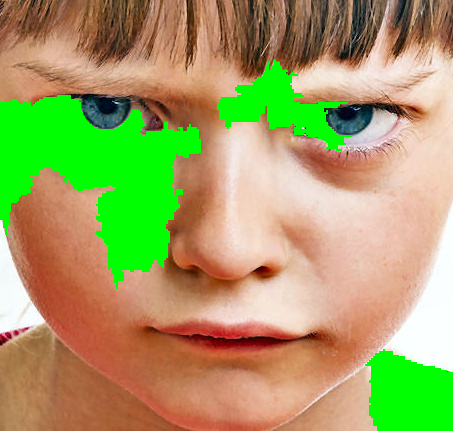

In [14]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from skimage.segmentation import mark_boundaries
from keras.applications.vgg16 import preprocess_input
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from PIL import Image
from pathlib import Path
from IPython.display import display
from lime.lime_image import LimeImageExplainer

# Provide the path to your image file
image_path = '/Users/isurudissanayake/Documents/Data/DATA_SET/EMOTION/Data_set/Angry/0281.jpg'  # Replace with your image path

# target_size = (224, 224)

# Check if the file exists
if Path(image_path).is_file():
    model_path = '/Users/isurudissanayake/Documents/Data/DATA_SET/EMOTION/Feature_extraction/VGG16/emotion_model.h5'
    target_size = (224, 224)

    # Load the pre-trained VGG16 model with top layers included
    base_model = VGG16(weights='imagenet', include_top=True)

    # Take the output of the base model up to the last convolutional layer
    x = base_model.get_layer('block5_pool').output

    # Add a new dense layer for output
    x = GlobalAveragePooling2D()(x)
    x = Dense(1024, activation='relu')(x)
    predictions = Dense(1, activation='sigmoid')(x)

    # Create a new model that takes the input of VGG16 and outputs the desired layer
    model = Model(inputs=base_model.input, outputs=predictions)

    # Process the input image
    img = np.array(Image.open(image_path).resize(target_size))
    img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)  # Convert RGB to BGR
    img = np.expand_dims(img, axis=0)  # Add a batch dimension
    img = preprocess_input(img)  # Preprocess the image

    # Preprocess the image for the explainer by dividing pixel values by 255
    img_scaled = img / 255.0

    # Predict ASD probability using the full VGG16 model
    prediction = model.predict(img)  # Access the first element for ASD probability

    emotion_labels = ['Angry', 'Fear', 'Joy', 'Natural', 'Sadness', 'Surprise']
    predicted_emotion_index = np.argmax(prediction)
    predicted_emotion = emotion_labels[predicted_emotion_index]
    prediction_probability = prediction[0][predicted_emotion_index]
    
    print(f"Predicted emotion: {predicted_emotion}")
    print(f"Prediction probability: {prediction_probability:.2f}")

    explainer = LimeImageExplainer()

    # Generate an explanation for the prediction using the explainer object
    explanation = explainer.explain_instance(img_scaled[0], model.predict, top_labels=1, hide_color=0, num_samples=10000, random_seed=42)

    # Visualize the explanation using matplotlib
    temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=False)

    # Resize the explanation mask to match the original image dimensions
    mask = cv2.resize(mask, (target_size[0], target_size[1]), interpolation=cv2.INTER_NEAREST)

    # Convert the mask to the original image mode
    original_image = Image.open(image_path)
    #original_image = original_image.convert("L")  # Convert the original image to grayscale
    original_width, original_height = original_image.size
    original_mode = original_image.mode

    # Overlay the explanation mask on the original image
    mask = cv2.resize(mask, (original_width, original_height), interpolation=cv2.INTER_NEAREST)
    original_image = np.array(original_image)
    original_image[mask > 0.5] = (0, 255, 0)

    display(Image.fromarray(original_image))


else:
    print("Error: Image file not found.")

In [2]:
import numpy as np
import cv2
from PIL import Image
from pathlib import Path
from IPython.display import display
from lime.lime_image import LimeImageExplainer
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense

# Provide the path to your image file
image_path = '/Users/isurudissanayake/Documents/Data/DATA_SET/EMOTION/Data_set/Sadness/0033.jpg'  # Replace with your image path

# Check if the file exists
if Path(image_path).is_file():
    model_path = '/Users/isurudissanayake/Documents/Data/DATA_SET/EMOTION/Feature_extraction/VGG16/emotion_model.h5'
    target_size = (224, 224)

    # Load the pre-trained VGG16 model with top layers included
    base_model = VGG16(weights='imagenet', include_top=True)

    # Take the output of the base model up to the last convolutional layer
    x = base_model.get_layer('block5_pool').output

    # Add a new dense layer for output
    x = GlobalAveragePooling2D()(x)
    x = Dense(1024, activation='relu')(x)
    predictions = Dense(1, activation='sigmoid')(x)

    # Create a new model that takes the input of VGG16 and outputs the desired layer
    model = Model(inputs=base_model.input, outputs=predictions)

    # Process the input image
    img = np.array(Image.open(image_path).resize(target_size))
    img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)  # Convert RGB to BGR
    img = np.expand_dims(img, axis=0)  # Add a batch dimension
    img = preprocess_input(img)  # Preprocess the image

    # Preprocess the image for the explainer by dividing pixel values by 255
    img_scaled = img / 255.0

    # Predict ASD probability using the full VGG16 model
    prediction = model.predict(img)  # Access the first element for ASD probability

    emotion_labels = ['Angry', 'Fear', 'Joy', 'Natural', 'Sadness', 'Surprise']
    predicted_emotion_index = np.argmax(prediction)
    predicted_emotion = emotion_labels[predicted_emotion_index]
    prediction_probability = prediction[0][predicted_emotion_index]

    print(f"Predicted emotion: {predicted_emotion}")
    print(f"Prediction probability: {prediction_probability:.2f}")

    explainer = LimeImageExplainer()

    # Generate an explanation for the prediction using the explainer object
    explanation = explainer.explain_instance(img_scaled[0], model.predict, top_labels=1, hide_color=0, num_samples=10000, random_seed=42)

    # Visualize the explanation using matplotlib
    temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=False)

    # Resize the explanation mask to match the original image dimensions
    mask = cv2.resize(mask, (target_size[0], target_size[1]), interpolation=cv2.INTER_NEAREST)

    # Overlay the explanation mask on the original image
    original_image = Image.open(image_path)
    original_width, original_height = original_image.size
    mask = cv2.resize(mask, (original_width, original_height), interpolation=cv2.INTER_NEAREST)
    original_image = np.array(original_image)
    original_image[mask > 0.5] = (0, 255, 0)

    display(Image.fromarray(original_image))

else:
    print("Error: Image file not found.")


1/1 [==============================] - 0s 144ms/step
Predicted emotion: Angry
Prediction probability: 1.00


  0%|          | 0/10000 [00:00<?, ?it/s]

1/1 [==============================] - 1s 847ms/step


KeyboardInterrupt: 

1/1 [==============================] - 1s 569ms/step
Predicted emotion: Joy
Prediction probability: 0.61


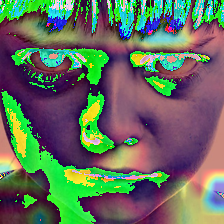

In [21]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from keras.applications.vgg16 import preprocess_input
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from PIL import Image
from pathlib import Path
from IPython.display import display
import tensorflow as tf

# Define Grad-CAM function
def generate_grad_cam(model, img_array, layer_name):
    # Create a model that maps the input image to the desired layer's output
    grad_model = Model(inputs=model.input, outputs=(model.get_layer(layer_name).output, model.output))

    # Compute the gradient of the predicted class with respect to the output feature map of the given layer
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        predicted_class_output = preds[:, np.argmax(preds)]  # Assuming ASD class is the first one

    grads = tape.gradient(predicted_class_output, last_conv_layer_output)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    last_conv_layer_output = last_conv_layer_output[0]

    # Compute the heatmap
    heatmap = tf.reduce_mean(tf.multiply(pooled_grads, last_conv_layer_output), axis=-1)
    heatmap = np.maximum(heatmap, 0)  # ReLU on the heatmap
    heatmap /= np.max(heatmap)  # Normalize

    return heatmap

# Provide the path to your image file
image_path = '/Users/isurudissanayake/Documents/Data/DATA_SET/EMOTION/Data_set/Angry/0281.jpg'  # Replace with your image path

# Check if the file exists
if Path(image_path).is_file():
    target_size = (224, 224)

    # Load the pre-trained VGG16 model with top layers included
    base_model = VGG16(weights='imagenet', include_top=True)

    # Take the output of the base model up to the last convolutional layer
    x = base_model.get_layer('block5_pool').output

    # Add a new dense layer for output
    x = GlobalAveragePooling2D()(x)
    x = Dense(1024, activation='relu')(x)
    predictions = Dense(6, activation='softmax')(x)  # Assuming 6 emotions

    # Create a new model that takes the input of VGG16 and outputs the desired layer
    model = Model(inputs=base_model.input, outputs=predictions)

    # Compile the model with appropriate loss function and optimizer
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    # Process the input image
    img = np.array(Image.open(image_path).resize(target_size))
    img = np.expand_dims(img, axis=0)  # Add a batch dimension
    img = preprocess_input(img)  # Preprocess the image

    # Predict emotion probabilities using the full VGG16 model
    prediction = model.predict(img)

    emotion_labels = ['Angry', 'Fear', 'Joy', 'Natural', 'Sadness', 'Surprise']
    predicted_emotion_index = np.argmax(prediction)
    predicted_emotion = emotion_labels[predicted_emotion_index]
    prediction_probability = prediction[0][predicted_emotion_index]

    print(f"Predicted emotion: {predicted_emotion}")
    print(f"Prediction probability: {prediction_probability:.2f}")

    # Generate Grad-CAM heatmap
    heatmap = generate_grad_cam(model, img, 'block5_conv3')

    # Resize heatmap to match the original image dimensions
    heatmap = cv2.resize(heatmap, (target_size[0], target_size[1]))

    # Overlay the heatmap on the original image
    heatmap = cv2.applyColorMap(np.uint8(255 * heatmap), cv2.COLORMAP_JET)
    superimposed_img = heatmap * 0.4 + img[0]

    # Display the superimposed image
    display(Image.fromarray(superimposed_img.astype(np.uint8)))

else:
    print("Error: Image file not found.")


1/1 [==============================] - 0s 225ms/step
Predicted emotion: Sadness
Prediction probability: 0.57


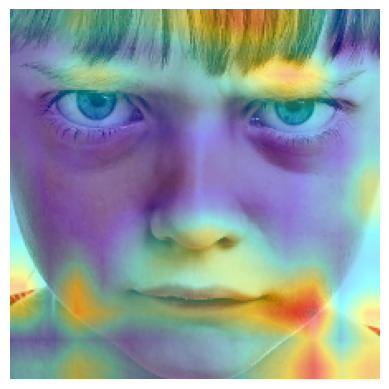

In [25]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.models import Model, load_model
import tensorflow as tf

# Define Grad-CAM function
def generate_grad_cam(model, img_array, layer_name):
    # Create a model that maps the input image to the desired layer's output
    grad_model = Model(inputs=model.input, outputs=(model.get_layer(layer_name).output, model.output))

    # Compute the gradient of the predicted class with respect to the output feature map of the given layer
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        predicted_class_output = preds[:, 0]  # Assuming ASD class is the first one

    grads = tape.gradient(predicted_class_output, last_conv_layer_output)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    last_conv_layer_output = last_conv_layer_output[0]

    # Compute the heatmap
    heatmap = tf.reduce_mean(tf.multiply(pooled_grads, last_conv_layer_output), axis=-1)
    heatmap = np.maximum(heatmap, 0)  # ReLU on the heatmap
    heatmap /= np.max(heatmap)  # Normalize

    return heatmap

# Define paths
input_image_path = '/Users/isurudissanayake/Documents/Data/DATA_SET/EMOTION/Data_set/Angry/0281.jpg'  # Replace with your image path
model_path = '/Users/isurudissanayake/Documents/Data/DATA_SET/EMOTION/Feature_extraction/VGG16/emotion_model.h5'
target_size = (224, 224)

# Load the pre-trained VGG16 model with top layers included
base_model = VGG16(weights='imagenet', include_top=True)

# Create a new model that takes the input of VGG16 and outputs the desired layer/
model = Model(inputs=base_model.input, outputs=base_model.get_layer('block5_conv3').output)

# Process the input image
img_original = cv2.imread(input_image_path)
img_original = cv2.resize(img_original, target_size)
img_for_model = preprocess_input(np.expand_dims(img_original, axis=0))

# Extract features using the full VGG16 model
features = model.predict(img_for_model)  # Use the new model

# Reshape features to match the expected input shape of trained_model
features_reshaped = np.reshape(features, (features.shape[0], 14, 14, 512))  # Reshape to (None, 14, 14, 512)

# Load the trained model
trained_model = load_model(model_path)

# Make predictions using the loaded model
prediction = trained_model.predict(features_reshaped)

emotion_labels = ['Angry', 'Fear', 'Joy', 'Natural', 'Sadness', 'Surprise']
predicted_emotion_index = np.argmax(prediction)
predicted_emotion = emotion_labels[predicted_emotion_index]
prediction_probability = prediction[0][predicted_emotion_index]

print(f"Predicted emotion: {predicted_emotion}")
print(f"Prediction probability: {prediction_probability:.2f}")

# Visualize the Grad-CAM heatmap
heatmap = generate_grad_cam(model, img_for_model, 'block5_conv3')

# Resize heatmap to match the size of the original image
heatmap = cv2.resize(heatmap, (img_original.shape[1], img_original.shape[0]))

# Apply colormap for better visualization
heatmap = np.uint8(255 * heatmap)
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

# Superimpose the heatmap on the original image
superimposed_img = cv2.addWeighted(img_original, 0.6, heatmap, 0.4, 0)

# Display the superimposed image
plt.imshow(cv2.cvtColor(superimposed_img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from PIL import Image
from pathlib import Path
from IPython.display import display
from lime.lime_image import LimeImageExplainer

# Load the trained model
model = load_model('/Users/isurudissanayake/Desktop/FASD/emotion_model.h5')

# Load the VGG16 model without the top classification layers
vgg16 = VGG16(weights='imagenet', include_top=False)

# Define a function to preprocess input image and extract features
def preprocess_image(image_path, feature_extraction_model):
    # Load and preprocess the input image
    img = image.load_img(image_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)

    # Extract features
    features = feature_extraction_model.predict(img_array)

    # Reshape the features to match the expected input shape of (None, 14, 14, 512)
    features = np.reshape(features, (features.shape[0], 7, 7, 512))

    return features

# Define a function to predict emotion from an input image
def predict_emotion(image_path, model, feature_extraction_model):
    # Preprocess the input image and extract features
    features = preprocess_image(image_path, feature_extraction_model)

    # Make prediction
    prediction = model.predict(features)

    # Decode the prediction
    emotions = ['Angry', 'Fear', 'Joy', 'Sad']
    predicted_emotion_index = np.argmax(prediction)
    predicted_emotion = emotions[predicted_emotion_index]

    # Get percentage of prediction for each emotion
    percentages = {emotion: round(float(prediction[0][i]) * 100, 2) for i, emotion in enumerate(emotions)}

    return predicted_emotion, percentages

# Path to the input image
input_image_path = '/Users/isurudissanayake/Desktop/ASD/Sad/1258.jpg'

# Predict emotion of the input image
predicted_emotion, percentages = predict_emotion(input_image_path, model, vgg16)
print("Predicted Emotion:", predicted_emotion)
print("Prediction Percentages:", percentages)
